<a href="https://colab.research.google.com/github/mBohunickaCharles/The-Wisdom-of-the-Crowd/blob/main/The_Wisdom_of_the_Crowd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Wisdom of the Crowd**

Recently, I had the pleasure of attending the Taste festival in London as part of a team-building activity. My team and I participated in a fun competition hosted by MOTH drinks, where the challenge was to guess the number of cans displayed in a fridge for a chance to win its contents filled with canned cocktails. As a maths enthusiast and computer science student, I decided to leverage my knowledge and employ the Wisdom of the Crowd phenomenon to enhance our chances in this guess competition. <br><br>

**What is the Wisdom of the Crowd?**

The Wisdom of the Crowd is a phenomenon where the collective opinion or judgment of a large group of people is often more accurate than that of a single expert. This concept relies on the idea that diverse, independent guesses from a group can average out to produce a remarkably accurate result.

For example, if a group of people independently guess the number of jellybeans in a jar, the average of their guesses tends to be closer to the actual number than most individual guesses. This principle is widely used in various fields, including economics, business, and science, to harness collective intelligence for decision-making and problem-solving.







Here is a video from the BBC documentary *The Code* that explains the Wisdom of the Crowd phenomenon:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/iOucwX7Z1HU?si=bLsKwSEREl-qef29" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>')

To leverage this phenomenon, I first needed to collect all previous guesses and calculate their mean. Manually going through each guess would have been very time-consuming. However, since the competition was hosted on Instagram, I was able to use web scraping to gather this data. I then stored it in a pandas DataFrame for easier visualization and cleaning.

In [ ]:
pip install instaloader

In [ ]:
# Import libraries
import pandas as pd
import instaloader

# Initialize Instaloader
L = instaloader.Instaloader()

# Log in (replace 'your_username' and 'your_password')
L.login('your_username', 'your_password')

# Specify the post
post_shortcode = 'C8H0GLNI6kF'
post = instaloader.Post.from_shortcode(L.context, post_shortcode)

# Extract comments
data = []
for comment in post.get_comments():
    data.append({
        'username': comment.owner.username,
        'comment': comment.text
    })

# Create DataFrame
df = pd.DataFrame(data)

In [ ]:
# Display first 5 rows of dataframe:
df.head()

,username,comment
0,remnantshockey,205
1,remnantshockey,201
2,emilsbee,207
3,emilyjames2,160
4,abby_jf,156


In [ ]:
# Display unique comments:
df.comment.unique()

array(['205', '201', '207', '160', '156', '131', '288', '186', '94',
       '192', '199', '91', '140',
       '177 @mothdrinks my new favourite Merlot after my introduction on a virgin flight 😂 I’ve clearly been living under a rock',
       '228 my wife would love these, she got enough of them on our flight to the states last week 😂 @jhill1105',
       '158',
       '408 inc the box in the bottom. You have almost as many disco balls as Shania’s space disco queer tiki bar ✌🏻 \U0001faa9 🌈 @ironkerton @itsketch',
       '111', '109', '206', '103', '108', '138', '195', '255',
       '135 ? 🤞🏽🤞🏽🤞🏽',
       '252 (the boxes in the bottom have drinks in them rightttt?!)',
       '92', '96', '245', '88', '127', '139', '169', '270', '85', '143',
       '125', '275', '98', '165', '360', '101', '117', '102', '80', '82',
       '93', '134', '222', '269', '97', '265', '136', '95', '304', '90',
       '112', '99', '89', '285', '204', '135', '214', '168', '120', '218',
       '148', '210', '240', '180

As we can see above, people entered not only number guesses, but in some cases also a short message.

This meant that numerical entries needed to be extracted from the comment column. For this reason I have created a new column called numbers.

In [ ]:
# Extract numbers from the comment column:
df['numbers'] = df['comment'].str.extract('(\d+)', expand=False)

In [ ]:
# Change the data type of the extracted column to float:
df['numbers'] = df['numbers'].astype(float)

Each contestant was allowed to make several entries to the competition. Let's have a look how many times people entered.

In [ ]:
username_counts = df['username'].value_counts().reset_index()
username_counts.columns = ['username', 'count']

username_counts

,username,count
0,_chlojean,32
1,maricialt,30
2,shaunaghyo,28
3,zoelliemase,22
4,halatkinson,21
...,...,...
631,adamsammour1,1
632,_megtwine_,1
633,rachsibs,1
634,astridmoonface,1


Wow! It's clear that some people are eager to win cocktails for their summer party or to make their dissertation writing go faster, as they entered the competition over 30 times.

Assuming that those with multiple entries will make close guesses around their main guess, I created a subset called "genuine_guess" or "genuine." This dataset includes only single entries, meaning only the guesses of users with one entry are considered.

In [ ]:
genuine_guess = username_counts[username_counts['count'] == 1]

In [ ]:
genuine = df[df['username'].isin(genuine_guess['username'])]

In [ ]:
genuine

,username,comment,numbers
4,abby_jf,156,156.0
5,rebeccarobinson_,131,131.0
6,davidthewin,288,288.0
7,lvkeannett,186,186.0
12,loissaunders_x,140,140.0
...,...,...,...
1272,ezzahum,273,273.0
1281,jratocliffe,196,196.0
1282,seanbrassill,191,191.0
1288,sophieeaton_,240,240.0


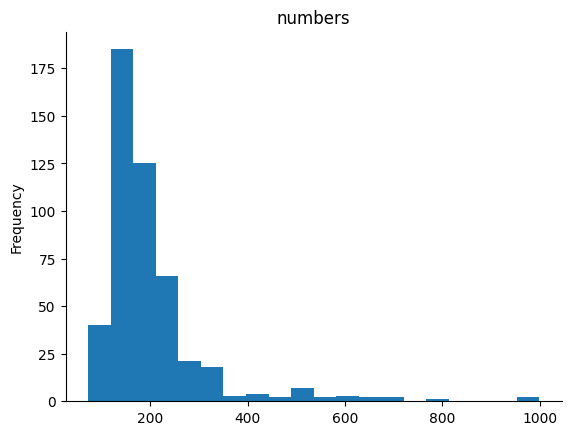

In [ ]:
# @title numbers

from matplotlib import pyplot as plt
genuine['numbers'].plot(kind='hist', bins=20, title='numbers')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Calculate the average for the column
average_value = genuine['numbers'].mean()
average_value_all = df['numbers'].mean()

print("Average value:", average_value, average_value_all)

Average value: 199.66459627329192 204.2097026604069


After calculating the average for both single-entry users and all entries, I found that the values were surprisingly close: ~200 and ~204, respectively. In the video above, we learned that the Wisdom of the Crowd for the jelly beans in a jar experiment was only 1% off the actual number.

To ensure my guesses were within a 1% error margin of my averages, I entered the following numbers:

* For single user guesses: 198, 199, 200, 201, and 202
* For all entries consideration: 202, 203, 204, 205, and 206

In [ ]:
df[df['numbers'] == 204]

,username,comment,numbers
79,raniascot1,204,204.0
268,katiescott_98,204😍😍,204.0
272,leann.e,204!,204.0
551,kara_mct,204,204.0
584,beckylrich,204,204.0
822,raniascot1,204,204.0
1041,spannerhollis,204,204.0
1043,amymead27,204,204.0
1085,emilsbee,204,204.0
1250,heatherwills13,204,204.0


In [ ]:
# Number of entries:
len(df)

1291

In [ ]:
# Save to CSV
df.to_csv('instagram_comments.csv', index=False)


### **Did I win???**

Unfortunately, I did not win. The number of cans in the fridge was far off from my scientific guess; there were 156 cans in total. Interestingly, the median guess of 174 was much closer to the actual number.

What went wrong? Unlike the experiment in the video, where participants didn't see previous guesses, I suspect that many contestants were 'inspired' by the public list of entries. This might have skewed the collective wisdom and affected the accuracy of the average guess.

Anyway, it was a fun experiment and my liver is more than grateful for not winning.